# Композиции алгоритмов машинного обучения. Задача классификации.

# Метод: AdaBoost

## Задание

1. Разработать программу реализующую алгоритм AdaBoost для анализа выбранного набора данных.
2. Визуализировать используемый набор данных и работу алгоритма.
3. Построить график зависимости качества классификации от n_estimators.
4. Построить график зависимости качества классификации от learning_rate.
5. Подобрать параметры алгоритма так, чтобы получить наилучшее качество модели на тестовых данных.

## Подключение необходимых библиотек

`%matplotlib inline` -> визуализирует графики с matplotlib прямо в jupyter notebook, а не в отдельном окне

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs

## Набор данных 1

In [2]:
X, y = make_moons(n_samples=2000, noise=0.3, random_state=0)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### Изобразим данные на графике.

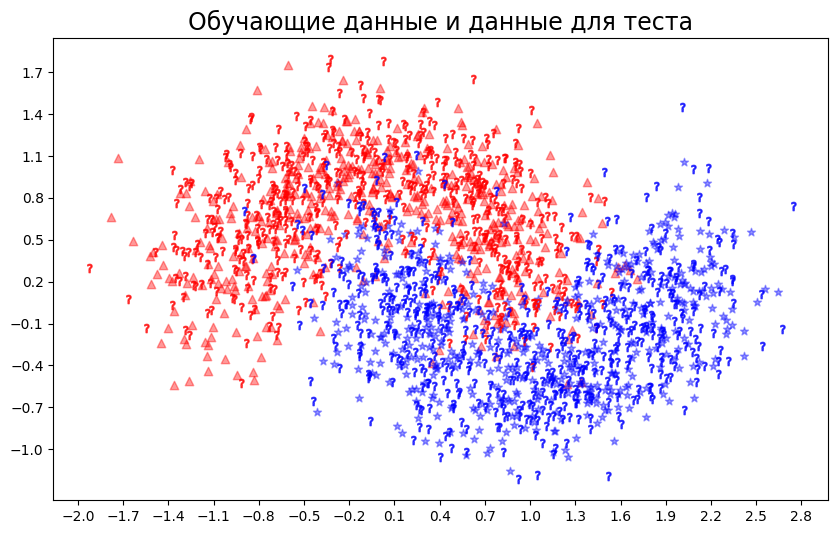

In [4]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="r", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="b", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-2, 3, 0.3))
ax.set_yticks(np.arange(-1, 2, 0.3))

plt.show()

### Реализуем метод AdaBoost для набора данных №1

#### Реализуем метод без гиперпараметров

In [5]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.893
Точность работы модели (model.score) = 0.893


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. Гиперпараметры: `n_estimators` и `learning_rate`.

> **n_estimators**: int, default=50<br>
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range **[1, inf)**.

> **learning_rate**: float, default=1.0<br>
Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range **(0.0, inf)**.


#### Поиск наилучших гиперпараметров для метода

In [6]:
%%time
value_accuracy_score_array = [[],[],[],[],[]]

# value_accuracy_score_array[0] - learning_rate="0.1"
# value_accuracy_score_array[1] - learning_rate="0.5"
# value_accuracy_score_array[2] - learning_rate="1.0"
# value_accuracy_score_array[3] - learning_rate="1.5"
# value_accuracy_score_array[4] - learning_rate="1.7"

# value_accuracy_score_array[0][0] - learning_rate="0.1" n_estimators="10"
# value_accuracy_score_array[0][1] - learning_rate="0.1" n_estimators="50"
# value_accuracy_score_array[0][2] - learning_rate="0.1" n_estimators="100"
# value_accuracy_score_array[0][3] - learning_rate="0.1" n_estimators="150"
# value_accuracy_score_array[0][4] - learning_rate="0.1" n_estimators="200"
# ...
# value_accuracy_score_array[1][0] - learning_rate="0.5" n_estimators="10"
# value_accuracy_score_array[1][1] - learning_rate="0.5" n_estimators="50"
# value_accuracy_score_array[1][2] - learning_rate="0.5" n_estimators="100"
# value_accuracy_score_array[1][3] - learning_rate="0.5" n_estimators="150"
# value_accuracy_score_array[1][4] - learning_rate="0.5" n_estimators="200"
# ...

values_learning_rate = [0.1, 0.5, 1.0, 1.5, 1.7]
values_n_estimators = [10, 50, 100, 150, 200]


# Индексы используются для записи в value_accuracy_score_array
index_learning_rate = 0
index_n_estimators = 0

for value_learning_rate in values_learning_rate:
    index_n_estimators=0
    for value_n_estimators in values_n_estimators:
        model = AdaBoostClassifier(n_estimators=value_n_estimators, learning_rate=value_learning_rate)
        cv_result = cross_validate(model, x_train, y_train, cv=3)  # Кросс_валидация
        sum_score_cross_validate = 0
        for i in range(3):
            sum_score_cross_validate += cv_result['test_score'][i]
        value_accuracy_score_array[index_learning_rate].append(sum_score_cross_validate/3)# avg score cross_validate
        index_n_estimators+=1
    index_learning_rate+=1    

print("learning_rate = 0.1 - avg score cross_validate for different n_estimators", value_accuracy_score_array[0],"\n")
print("learning_rate = 0.5 - avg score cross_validate for different n_estimators", value_accuracy_score_array[1],"\n")
print("learning_rate = 1.0 - avg score cross_validate for different n_estimators", value_accuracy_score_array[2],"\n")
print("learning_rate = 1.5 - avg score cross_validate for different n_estimators", value_accuracy_score_array[3],"\n")
print("learning_rate = 1.7 - avg score cross_validate for different n_estimators", value_accuracy_score_array[4],"\n")

learning_rate = 0.1 - avg score cross_validate for different n_estimators [0.8580017142891393, 0.9159968351585118, 0.9240018461575348, 0.9230008451565338, 0.9230038421655188] 

learning_rate = 0.5 - avg score cross_validate for different n_estimators [0.9060137982293671, 0.9180018341694988, 0.9170038301774829, 0.9160028291764819, 0.912007816199433] 

learning_rate = 1.0 - avg score cross_validate for different n_estimators [0.9230008451565338, 0.9150048251844659, 0.912010813208418, 0.9150108192024361, 0.9120078161994329] 

learning_rate = 1.5 - avg score cross_validate for different n_estimators [0.8910017802233371, 0.9050038062014111, 0.901997806189423, 0.8960007912103721, 0.898002793212374] 

learning_rate = 1.7 - avg score cross_validate for different n_estimators [0.8999958041874211, 0.906996817176458, 0.9099998201794609, 0.902003800207393, 0.9000017982053911] 

CPU times: user 4.77 s, sys: 17 ms, total: 4.78 s
Wall time: 4.58 s


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `learning_rate` и `n_estimators` модель дает лучший результат.

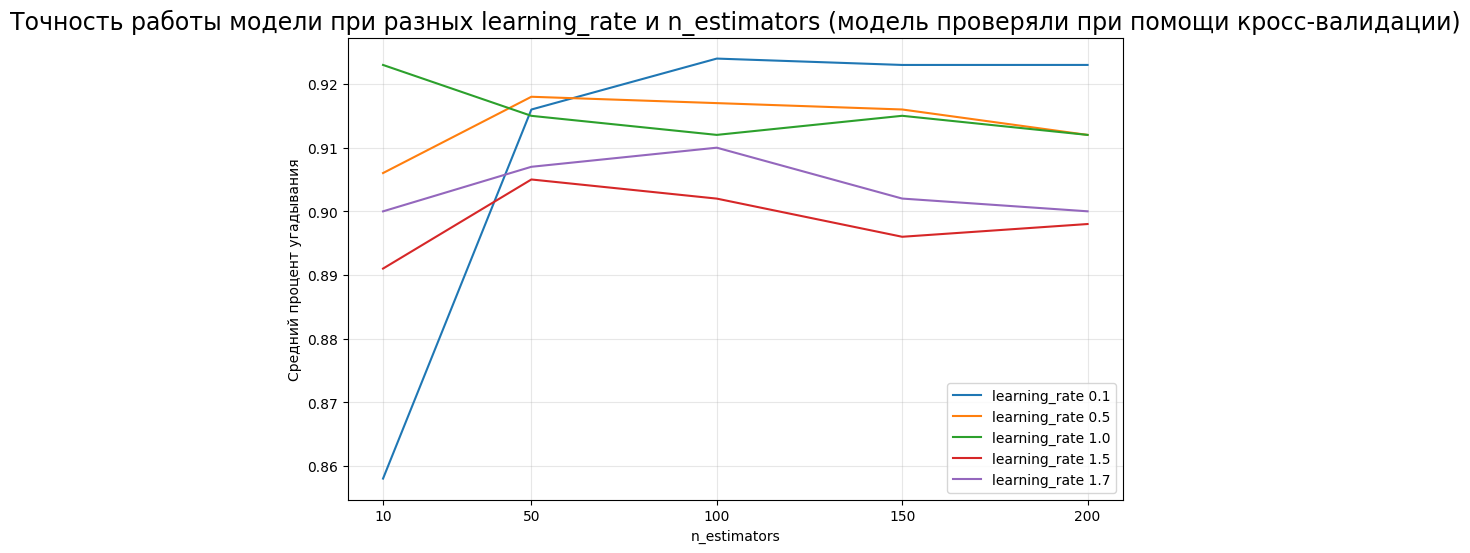

In [7]:
fig, ax = plt.subplots(figsize = (10,6))

for i in range(len(values_learning_rate)):
    ax.plot(values_n_estimators, value_accuracy_score_array[i],label="learning_rate " +
            str(values_learning_rate[i]))

ax.set_title("Точность работы модели при разных learning_rate и n_estimators \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("n_estimators") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(values_n_estimators)

ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**Из полученного графика видно, что наилучшее решение получится при <u>n_estimators=100</u> и <u>learning_rate=0.1</u>. Протестировав модель с помощью кросс-валидации, мы понижаем шанс переобучения модели.**

#### Реализуем метод с наилучшими гиперпараметрами

In [8]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.9
Точность работы модели (model.score) = 0.9


#### Изобразим результат работы алгоритма на графике

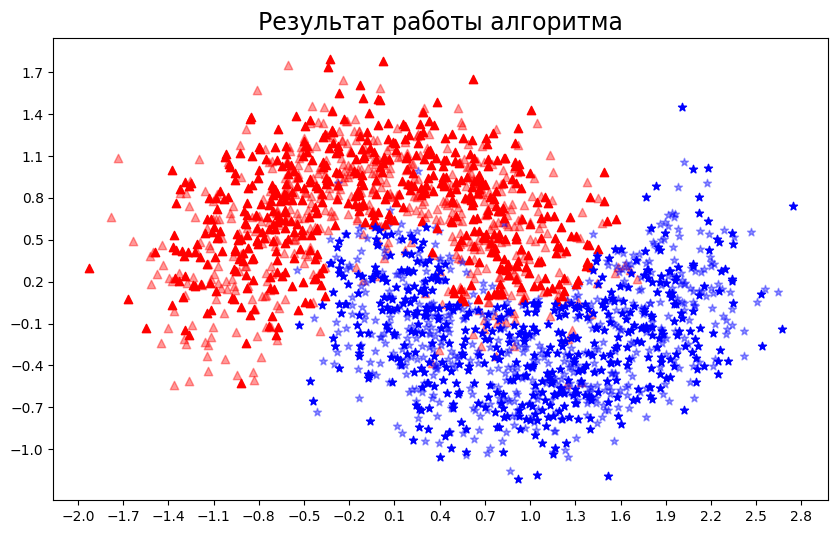

In [9]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-2, 3, 0.3))
ax.set_yticks(np.arange(-1, 2, 0.3))

plt.show()

## Набор данных 2

In [10]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, class_sep=0.4,
                           random_state=1, n_clusters_per_class=1)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#### Изобразим данные на графике.

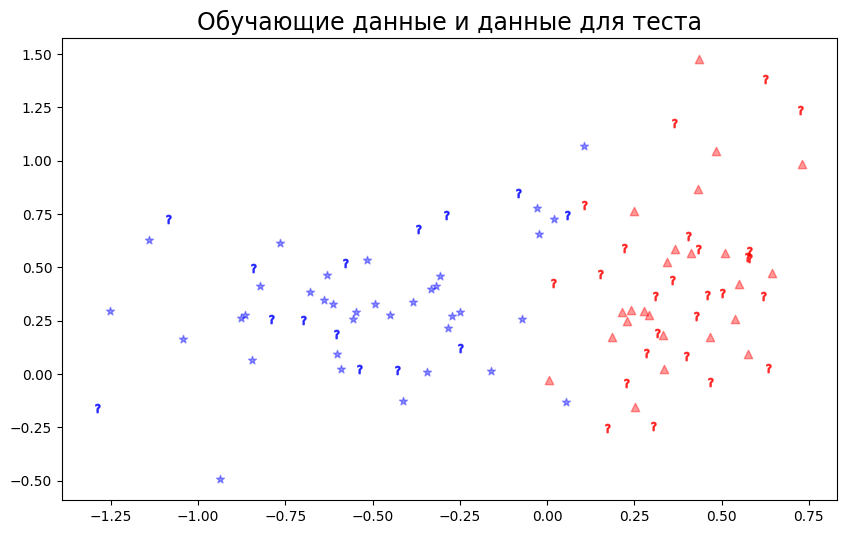

In [12]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="r", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="b", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-1.25, 1, 0.25))
ax.set_yticks(np.arange(-0.5, 1.75, 0.25))

plt.show()

### Реализуем метод AdaBoost для набора данных №2

#### Реализуем метод без гиперпараметров

In [13]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.95
Точность работы модели (model.score) = 0.95


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. Гиперпараметры: `n_estimators` и `learning_rate`.

> **n_estimators**: int, default=50<br>
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range **[1, inf)**.

> **learning_rate**: float, default=1.0<br>
Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range **(0.0, inf)**.


#### Поиск наилучших гиперпараметров для метода

In [14]:
%%time
value_accuracy_score_array = [[],[],[],[],[]]

# value_accuracy_score_array[0] - learning_rate="0.1"
# value_accuracy_score_array[1] - learning_rate="0.5"
# value_accuracy_score_array[2] - learning_rate="1.0"
# value_accuracy_score_array[3] - learning_rate="1.5"
# value_accuracy_score_array[4] - learning_rate="1.7"

# value_accuracy_score_array[0][0] - learning_rate="0.1" n_estimators="10"
# value_accuracy_score_array[0][1] - learning_rate="0.1" n_estimators="50"
# value_accuracy_score_array[0][2] - learning_rate="0.1" n_estimators="100"
# value_accuracy_score_array[0][3] - learning_rate="0.1" n_estimators="150"
# value_accuracy_score_array[0][4] - learning_rate="0.1" n_estimators="200"
# ...
# value_accuracy_score_array[1][0] - learning_rate="0.5" n_estimators="10"
# value_accuracy_score_array[1][1] - learning_rate="0.5" n_estimators="50"
# value_accuracy_score_array[1][2] - learning_rate="0.5" n_estimators="100"
# value_accuracy_score_array[1][3] - learning_rate="0.5" n_estimators="150"
# value_accuracy_score_array[1][4] - learning_rate="0.5" n_estimators="200"
# ...

values_learning_rate = [0.1, 0.5, 1.0, 1.5, 1.7]
values_n_estimators = [10, 50, 100, 150, 200]


# Индексы используются для записи в value_accuracy_score_array
index_learning_rate = 0
index_n_estimators = 0

for value_learning_rate in values_learning_rate:
    index_n_estimators=0
    for value_n_estimators in values_n_estimators:
        model = AdaBoostClassifier(n_estimators=value_n_estimators, learning_rate=value_learning_rate)
        cv_result = cross_validate(model, x_train, y_train, cv=3)  # Кросс_валидация
        sum_score_cross_validate = 0
        for i in range(3):
            sum_score_cross_validate += cv_result['test_score'][i]
        value_accuracy_score_array[index_learning_rate].append(sum_score_cross_validate/3)# avg score cross_validate
        index_n_estimators+=1
    index_learning_rate+=1    

print("learning_rate = 0.1 - avg score cross_validate for different n_estimators", value_accuracy_score_array[0],"\n")
print("learning_rate = 0.5 - avg score cross_validate for different n_estimators", value_accuracy_score_array[1],"\n")
print("learning_rate = 1.0 - avg score cross_validate for different n_estimators", value_accuracy_score_array[2],"\n")
print("learning_rate = 1.5 - avg score cross_validate for different n_estimators", value_accuracy_score_array[3],"\n")
print("learning_rate = 1.7 - avg score cross_validate for different n_estimators", value_accuracy_score_array[4],"\n")

learning_rate = 0.1 - avg score cross_validate for different n_estimators [0.9833333333333334, 0.9333333333333332, 0.9333333333333332, 0.9333333333333332, 0.9333333333333332] 

learning_rate = 0.5 - avg score cross_validate for different n_estimators [0.9833333333333334, 0.9833333333333334, 0.9833333333333334, 0.9833333333333334, 0.9833333333333334] 

learning_rate = 1.0 - avg score cross_validate for different n_estimators [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667] 

learning_rate = 1.5 - avg score cross_validate for different n_estimators [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667] 

learning_rate = 1.7 - avg score cross_validate for different n_estimators [0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667] 

CPU times: user 2.61 s, sys: 23.2 ms, total: 2.63 s
Wall time: 2.26 s


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `learning_rate` и `n_estimators` модель дает лучший результат.

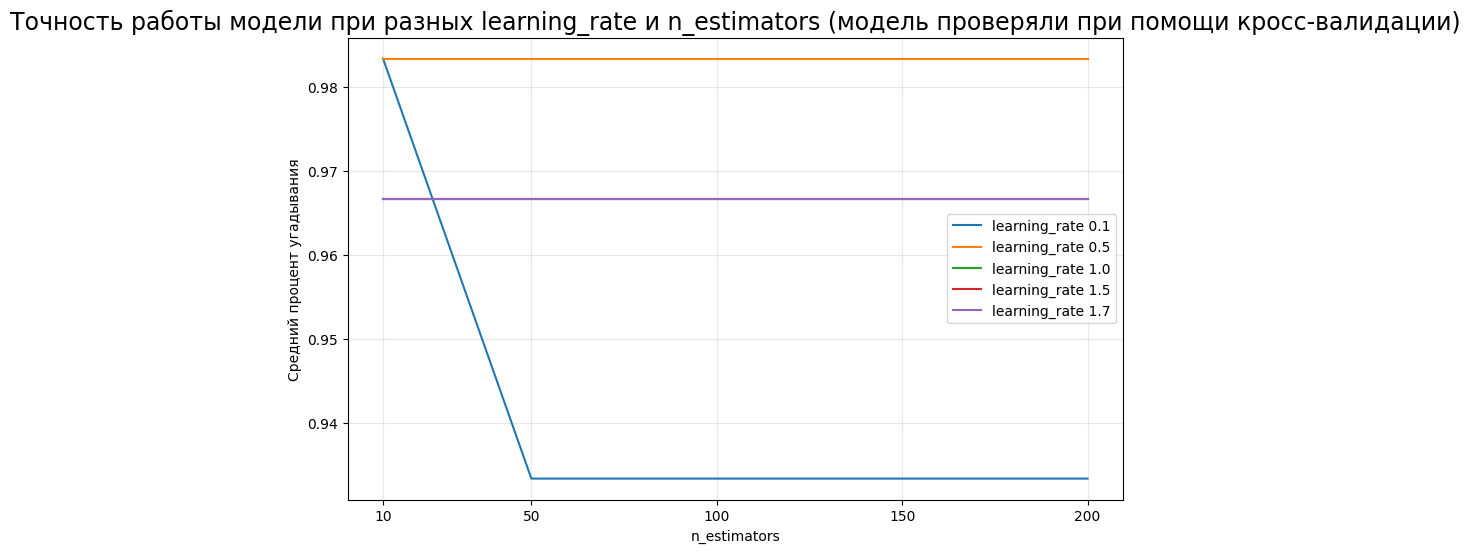

In [15]:
fig, ax = plt.subplots(figsize = (10,6))

for i in range(len(values_learning_rate)):
    ax.plot(values_n_estimators, value_accuracy_score_array[i],label="learning_rate " +
            str(values_learning_rate[i]))

ax.set_title("Точность работы модели при разных learning_rate и n_estimators \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("n_estimators") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(values_n_estimators)

ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**Слишком мало данных, чтобы сделать какие-то выводы по гиперпараметрам. Все гиперпараметры дают +- одинаковый результат, отличающийся только в пределах небольшой погрешности. Протестировав модель с помощью кросс-валидации, мы понижаем шанс переобучения модели.<br>
Возьмем:<br>
-> n_estimators=50<br>
-> learning_rate=0.5**

#### Реализуем метод с наилучшими гиперпараметрами

In [16]:
model = AdaBoostClassifier(n_estimators=50, learning_rate=0.5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.95
Точность работы модели (model.score) = 0.95


#### Изобразим результат работы алгоритма на графике

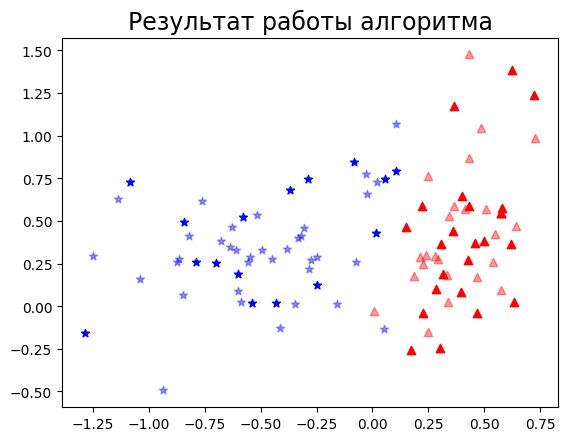

In [17]:
fig, ax = plt.subplots()

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-1.25, 1, 0.25))
ax.set_yticks(np.arange(-0.5, 1.75, 0.25))

plt.show()

## Набор данных 3

In [18]:
X, y = make_circles(n_samples=100, noise=0.2, factor=0.3, random_state=1)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#### Изобразим данные на графике.

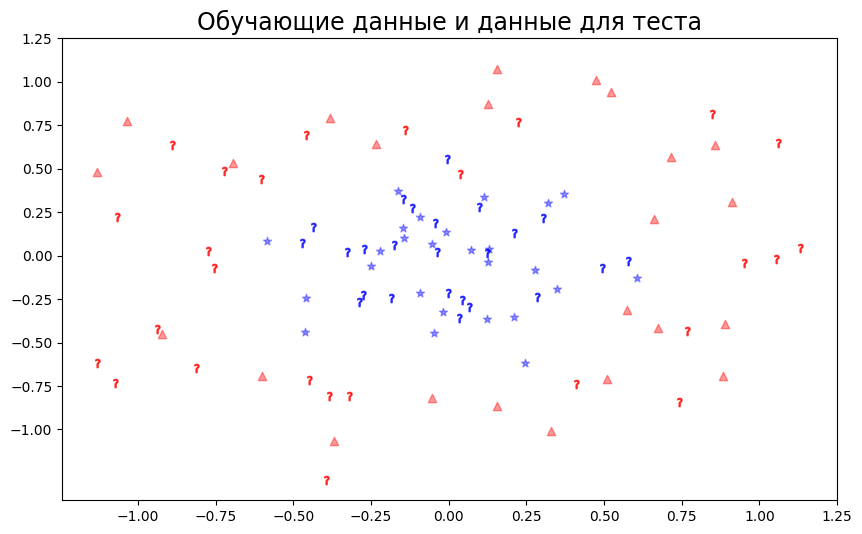

In [20]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="r", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="b", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-1, 1.5, 0.25))
ax.set_yticks(np.arange(-1, 1.5, 0.25))

plt.show()

### Реализуем метод AdaBoost для набора данных №3

#### Реализуем метод без гиперпараметров

In [21]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.94
Точность работы модели (model.score) = 0.94


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. Гиперпараметры: `n_estimators` и `learning_rate`.

> **n_estimators**: int, default=50<br>
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range **[1, inf)**.

> **learning_rate**: float, default=1.0<br>
Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range **(0.0, inf)**.


#### Поиск наилучших гиперпараметров для метода

In [22]:
%%time
value_accuracy_score_array = [[],[],[],[],[]]

# value_accuracy_score_array[0] - learning_rate="0.1"
# value_accuracy_score_array[1] - learning_rate="0.5"
# value_accuracy_score_array[2] - learning_rate="1.0"
# value_accuracy_score_array[3] - learning_rate="1.5"
# value_accuracy_score_array[4] - learning_rate="1.7"

# value_accuracy_score_array[0][0] - learning_rate="0.1" n_estimators="10"
# value_accuracy_score_array[0][1] - learning_rate="0.1" n_estimators="50"
# value_accuracy_score_array[0][2] - learning_rate="0.1" n_estimators="100"
# value_accuracy_score_array[0][3] - learning_rate="0.1" n_estimators="150"
# value_accuracy_score_array[0][4] - learning_rate="0.1" n_estimators="200"
# ...
# value_accuracy_score_array[1][0] - learning_rate="0.5" n_estimators="10"
# value_accuracy_score_array[1][1] - learning_rate="0.5" n_estimators="50"
# value_accuracy_score_array[1][2] - learning_rate="0.5" n_estimators="100"
# value_accuracy_score_array[1][3] - learning_rate="0.5" n_estimators="150"
# value_accuracy_score_array[1][4] - learning_rate="0.5" n_estimators="200"
# ...

values_learning_rate = [0.1, 0.5, 1.0, 1.5, 1.7]
values_n_estimators = [10, 50, 100, 150, 200]


# Индексы используются для записи в value_accuracy_score_array
index_learning_rate = 0
index_n_estimators = 0

for value_learning_rate in values_learning_rate:
    index_n_estimators=0
    for value_n_estimators in values_n_estimators:
        model = AdaBoostClassifier(n_estimators=value_n_estimators, learning_rate=value_learning_rate)
        cv_result = cross_validate(model, x_train, y_train, cv=3)  # Кросс_валидация
        sum_score_cross_validate = 0
        for i in range(3):
            sum_score_cross_validate += cv_result['test_score'][i]
        value_accuracy_score_array[index_learning_rate].append(sum_score_cross_validate/3)# avg score cross_validate
        index_n_estimators+=1
    index_learning_rate+=1    

print("learning_rate = 0.1 - avg score cross_validate for different n_estimators", value_accuracy_score_array[0],"\n")
print("learning_rate = 0.5 - avg score cross_validate for different n_estimators", value_accuracy_score_array[1],"\n")
print("learning_rate = 1.0 - avg score cross_validate for different n_estimators", value_accuracy_score_array[2],"\n")
print("learning_rate = 1.5 - avg score cross_validate for different n_estimators", value_accuracy_score_array[3],"\n")
print("learning_rate = 1.7 - avg score cross_validate for different n_estimators", value_accuracy_score_array[4],"\n")

learning_rate = 0.1 - avg score cross_validate for different n_estimators [0.9203431372549019, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019] 

learning_rate = 0.5 - avg score cross_validate for different n_estimators [0.9203431372549019, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019] 

learning_rate = 1.0 - avg score cross_validate for different n_estimators [0.9203431372549019, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019] 

learning_rate = 1.5 - avg score cross_validate for different n_estimators [0.9203431372549019, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019] 

learning_rate = 1.7 - avg score cross_validate for different n_estimators [0.9007352941176471, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019, 0.9203431372549019] 

CPU times: user 3.67 s, sys: 46.4 ms, total: 3.72 s
Wall time: 3.35 s


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `learning_rate` и `n_estimators` модель дает лучший результат.

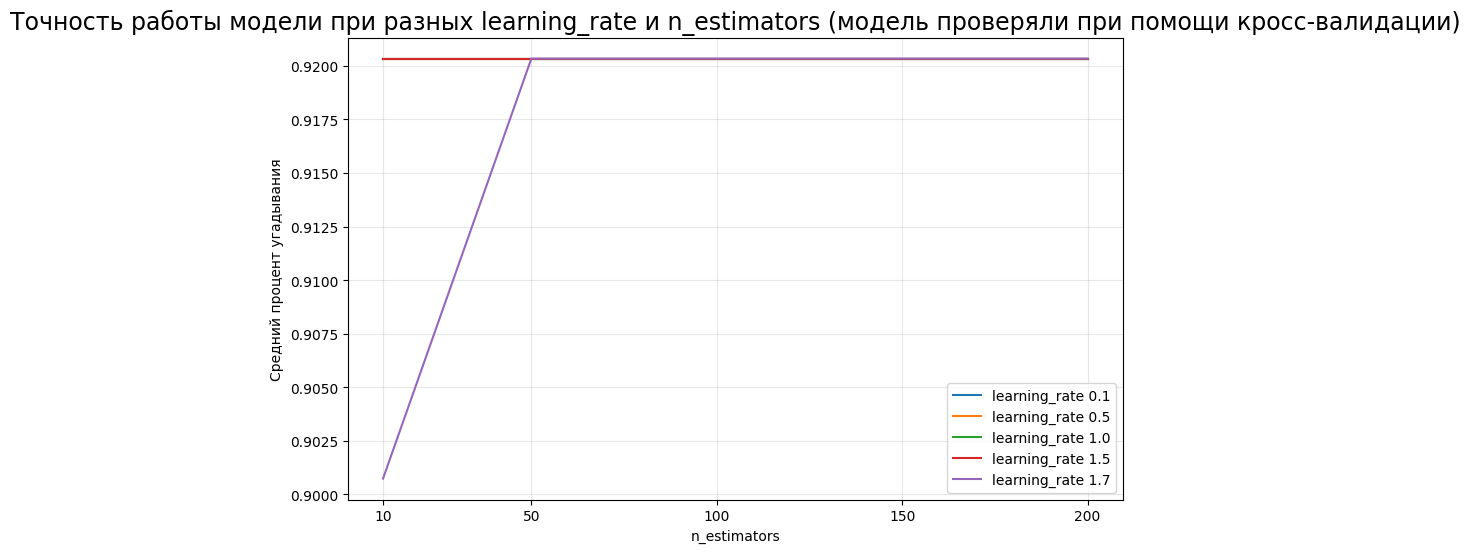

In [23]:
fig, ax = plt.subplots(figsize = (10,6))

for i in range(len(values_learning_rate)):
    ax.plot(values_n_estimators, value_accuracy_score_array[i],label="learning_rate " +
            str(values_learning_rate[i]))

ax.set_title("Точность работы модели при разных learning_rate и n_estimators \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("n_estimators") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(values_n_estimators)

ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**Слишком мало данных, чтобы сделать какие-то выводы по гиперпараметрам. Все гиперпараметры дают +- одинаковый результат, отличающийся только в пределах небольшой погрешности. Протестировав модель с помощью кросс-валидации, мы понижаем шанс переобучения модели.<br>
Возьмем:<br>
-> n_estimators=100<br>
-> learning_rate=0.5**

#### Реализуем метод с наилучшими гиперпараметрами

In [24]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.94
Точность работы модели (model.score) = 0.94


#### Изобразим результат работы алгоритма на графике

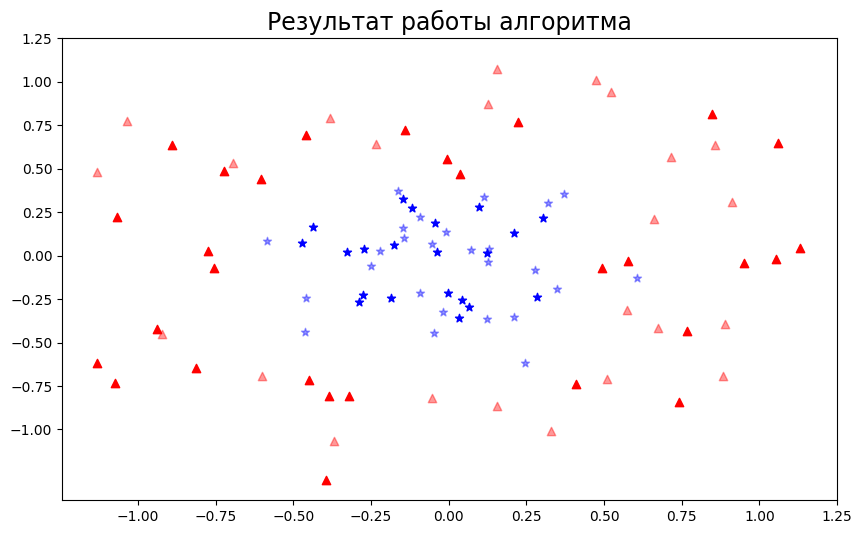

In [25]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-1, 1.5, 0.25))
ax.set_yticks(np.arange(-1, 1.5, 0.25))

plt.show()

## Набор данных 4

In [26]:
X, y = make_blobs(n_samples=100, centers=[[4, 4], [-4, -4]], cluster_std=2, random_state=0)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X= np.dot(X, transformation)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#### Изобразим данные на графике.

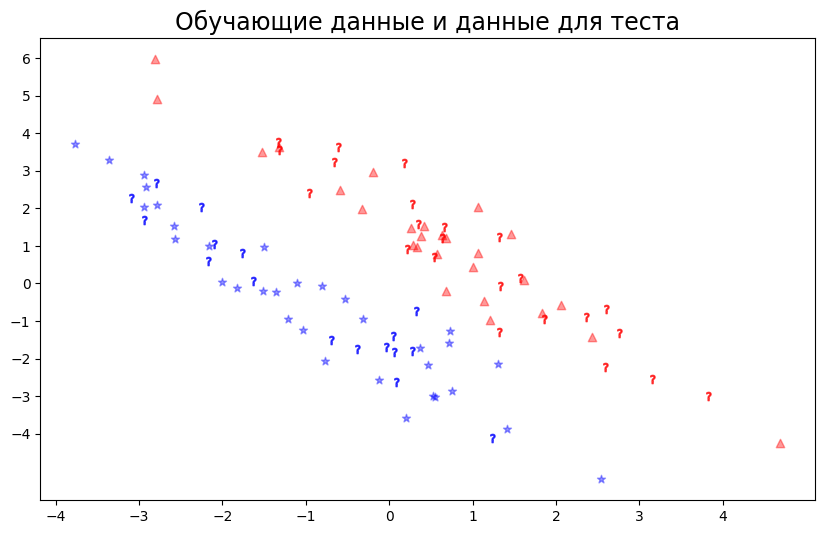

In [28]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="r", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="b", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(-4, 7, 1))

plt.show()

### Реализуем метод AdaBoost для набора данных №4

#### Реализуем метод без гиперпараметров

In [29]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.925
Точность работы модели (model.score) = 0.925


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. Гиперпараметры: `n_estimators` и `learning_rate`.

> **n_estimators**: int, default=50<br>
The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early. Values must be in the range **[1, inf)**.

> **learning_rate**: float, default=1.0<br>
Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters. Values must be in the range **(0.0, inf)**.


#### Поиск наилучших гиперпараметров для метода

In [30]:
%%time
value_accuracy_score_array = [[],[],[],[],[]]

# value_accuracy_score_array[0] - learning_rate="0.1"
# value_accuracy_score_array[1] - learning_rate="0.5"
# value_accuracy_score_array[2] - learning_rate="1.0"
# value_accuracy_score_array[3] - learning_rate="1.5"
# value_accuracy_score_array[4] - learning_rate="1.7"

# value_accuracy_score_array[0][0] - learning_rate="0.1" n_estimators="10"
# value_accuracy_score_array[0][1] - learning_rate="0.1" n_estimators="50"
# value_accuracy_score_array[0][2] - learning_rate="0.1" n_estimators="100"
# value_accuracy_score_array[0][3] - learning_rate="0.1" n_estimators="150"
# value_accuracy_score_array[0][4] - learning_rate="0.1" n_estimators="200"
# ...
# value_accuracy_score_array[1][0] - learning_rate="0.5" n_estimators="10"
# value_accuracy_score_array[1][1] - learning_rate="0.5" n_estimators="50"
# value_accuracy_score_array[1][2] - learning_rate="0.5" n_estimators="100"
# value_accuracy_score_array[1][3] - learning_rate="0.5" n_estimators="150"
# value_accuracy_score_array[1][4] - learning_rate="0.5" n_estimators="200"
# ...

values_learning_rate = [0.1, 0.5, 1.0, 1.5, 1.7]
values_n_estimators = [10, 50, 100, 150, 200]


# Индексы используются для записи в value_accuracy_score_array
index_learning_rate = 0
index_n_estimators = 0

for value_learning_rate in values_learning_rate:
    index_n_estimators=0
    for value_n_estimators in values_n_estimators:
        model = AdaBoostClassifier(n_estimators=value_n_estimators, learning_rate=value_learning_rate)
        cv_result = cross_validate(model, x_train, y_train, cv=3)  # Кросс_валидация
        sum_score_cross_validate = 0
        for i in range(3):
            sum_score_cross_validate += cv_result['test_score'][i]
        value_accuracy_score_array[index_learning_rate].append(sum_score_cross_validate/3)# avg score cross_validate
        index_n_estimators+=1
    index_learning_rate+=1    

print("learning_rate = 0.1 - avg score cross_validate for different n_estimators", value_accuracy_score_array[0],"\n")
print("learning_rate = 0.5 - avg score cross_validate for different n_estimators", value_accuracy_score_array[1],"\n")
print("learning_rate = 1.0 - avg score cross_validate for different n_estimators", value_accuracy_score_array[2],"\n")
print("learning_rate = 1.5 - avg score cross_validate for different n_estimators", value_accuracy_score_array[3],"\n")
print("learning_rate = 1.7 - avg score cross_validate for different n_estimators", value_accuracy_score_array[4],"\n")

learning_rate = 0.1 - avg score cross_validate for different n_estimators [0.65, 0.8666666666666667, 0.9166666666666666, 0.9, 0.9] 

learning_rate = 0.5 - avg score cross_validate for different n_estimators [0.8500000000000001, 0.8999999999999999, 0.9166666666666666, 0.9166666666666666, 0.8999999999999999] 

learning_rate = 1.0 - avg score cross_validate for different n_estimators [0.9166666666666666, 0.8999999999999999, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666] 

learning_rate = 1.5 - avg score cross_validate for different n_estimators [0.85, 0.8999999999999999, 0.9166666666666666, 0.8999999999999999, 0.8999999999999999] 

learning_rate = 1.7 - avg score cross_validate for different n_estimators [0.9166666666666666, 0.8999999999999999, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666] 

CPU times: user 3.72 s, sys: 24.9 ms, total: 3.74 s
Wall time: 3.36 s


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `learning_rate` и `n_estimators` модель дает лучший результат.

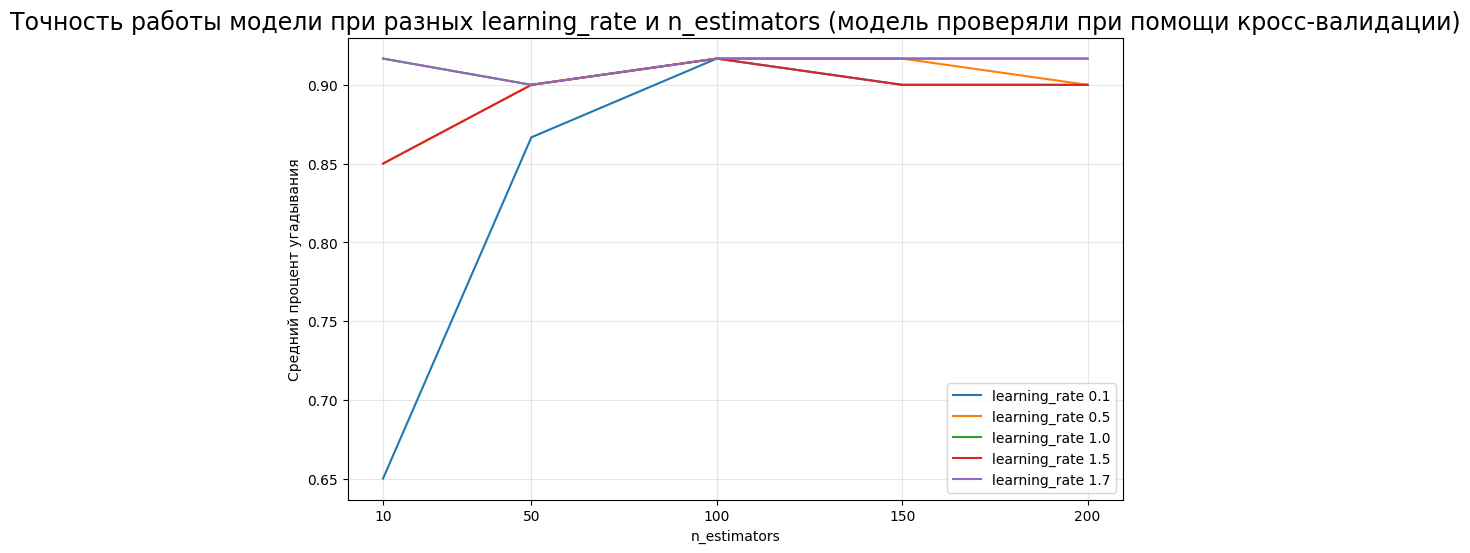

In [31]:
fig, ax = plt.subplots(figsize = (10,6))

for i in range(len(values_learning_rate)):
    ax.plot(values_n_estimators, value_accuracy_score_array[i],label="learning_rate " +
            str(values_learning_rate[i]))

ax.set_title("Точность работы модели при разных learning_rate и n_estimators \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("n_estimators") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(values_n_estimators)

ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**Из полученного графика видно, что наилучшее решение получится при <u>n_estimators=100</u> и <u>learning_rate=1.7</u>. Протестировав модель с помощью кросс-валидации, мы понижаем шанс переобучения модели.**

#### Реализуем метод с наилучшими гиперпараметрами

In [32]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=1.7)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model.score) =", model.score(x_test, y_test))

Точность работы модели (accuracy_score) = 0.975
Точность работы модели (model.score) = 0.975


#### Изобразим результат работы алгоритма на графике

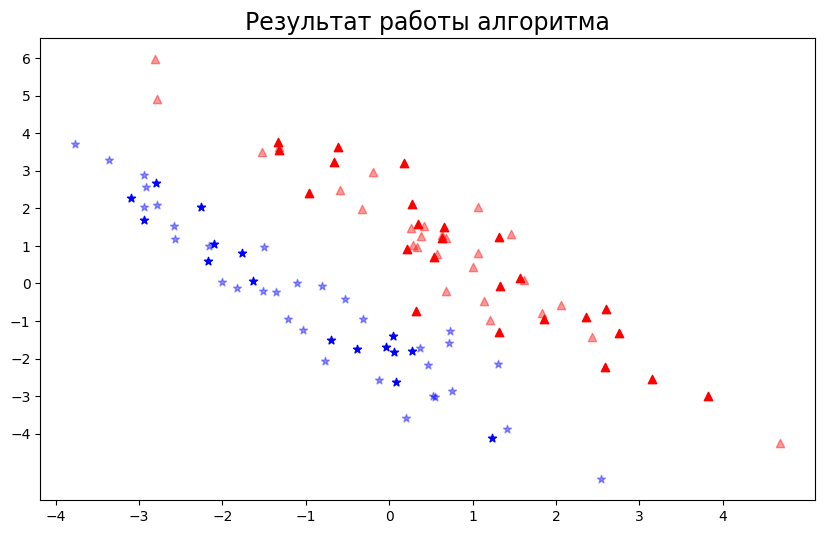

In [33]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(-4, 7, 1))

plt.show()